In [1]:
#importing all the reqired libararies 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
#import data to data frame
leads=pd.read_csv("Leads.csv")

In [3]:
# exploratory data analysis - have a look at data
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# exploratory data analysis - have a look at number of rows and columns
leads.shape

(9240, 37)

In [5]:
# exploratory data analysis - have a look at data types of variables
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#exploratory data analysis - count of missing values
100*(leads.isnull().sum()/len(leads.index))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# data cleaning - droping columns with more than 30% missing values
leads1=leads.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], 1)
100*(leads1.isnull().sum()/len(leads.index))

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
# data cleaning - replacing missing values with a categorical variable for variables which have descrete levels
leads1['Country']=leads1['Country'].fillna('others')
leads1['Specialization']=leads1['Specialization'].fillna('others')
leads1['How did you hear about X Education']=leads1['How did you hear about X Education'].fillna('others')
leads1['What is your current occupation']=leads1['What is your current occupation'].fillna('others')
leads1['What matters most to you in choosing a course']=leads1['What matters most to you in choosing a course'].fillna('others')
leads1['Lead Profile']=leads1['Lead Profile'].fillna('others')
leads1['City']=leads1['City'].fillna('others')
leads1['Lead Source']=leads1['Lead Source'].fillna('others')
100*(leads1.isnull().sum()/len(leads.index))

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [9]:
#count of null values in TotalVisits
leads1['TotalVisits'].isnull().sum()

137

In [10]:
#count of all levels within TotalVisits
leads1['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [11]:
#data cleaning - filling the missing values with most occuring category within variable
leads1['TotalVisits']=leads1['TotalVisits'].fillna(leads1['TotalVisits'].mode()[0])
leads1['Page Views Per Visit']=leads1['Page Views Per Visit'].fillna(leads1['Page Views Per Visit'].mode()[0])
leads1['Last Activity']=leads1['Last Activity'].fillna(leads1['Last Activity'].mode()[0])
100*(leads1.isnull().sum()/len(leads.index))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [12]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [13]:
# check for similar variables 
leads1['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
others                 36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [14]:
#data cleaning - replacing similar values
leads1['Lead Source']=leads1['Lead Source'].replace('google','Google')
leads1['Lead Source']=leads1['Lead Source'].replace('welearnblog_Home','WeLearn')
leads1['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
others                 36
bing                    6
Click2call              4
Press_Release           2
Social Media            2
WeLearn                 2
Live Chat               2
testone                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [15]:
leads1['Country'].value_counts()

India                   6492
others                  2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [16]:
# data cleaning
leads1['Country']=leads1['Country'].replace('unknown','others')
leads1['Country'].value_counts()

India                   6492
others                  2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark       

In [17]:
leads1['Specialization'].value_counts()

Select                               1942
others                               1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
# data cleaning
leads1['Specialization']=leads1['Specialization'].replace('Select','others')
leads1['Specialization'].value_counts()

others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
leads1['How did you hear about X Education'].value_counts()

Select                   5043
others                   2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
# data cleaning
leads1['How did you hear about X Education']=leads1['How did you hear about X Education'].replace('Select','others')
leads1['How did you hear about X Education']=leads1['How did you hear about X Education'].replace('Other','others')
leads1['How did you hear about X Education'].value_counts()

others                   7436
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [21]:
leads1['What is your current occupation'].value_counts()

Unemployed              5600
others                  2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
#data cleaning
leads1['What is your current occupation']=leads1['What is your current occupation'].replace('Other','others')
leads1['What is your current occupation'].value_counts()

Unemployed              5600
others                  2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
leads1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
others                       2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
#data cleaning
leads1['What matters most to you in choosing a course']=leads1['What matters most to you in choosing a course'].replace('Other','others')
leads1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
others                       2710
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
leads1['Lead Profile'].value_counts()

Select                         4146
others                         2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [26]:
#data cleaning
leads1['Lead Profile']=leads1['Lead Profile'].replace('Select','others')
leads1['Lead Profile']=leads1['Lead Profile'].replace('Other Leads','others')
leads1['Lead Profile'].value_counts()

others                         7342
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [27]:
leads1['City'].value_counts()

Mumbai                         3222
Select                         2249
others                         1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
#data cleaning
leads1['City']=leads1['City'].replace('Select','others')
leads1['City']=leads1['City'].replace('Other Cities','others')
leads1['City'].value_counts()

others                         4355
Mumbai                         3222
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
leads1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [30]:
#data cleaning
# there is single level or category in variables like Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque 
# so its better to drop them assuming that each and every leads are intrested in these variables

leads2=leads1.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)
leads2.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,others,others,No,Modified


In [31]:
leads2.shape

(9240, 26)

In [32]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [33]:
#creating dummy variable
dmy=pd.get_dummies(leads2, columns=['Lead Origin', 'Lead Source', 'Do Not Email','Do Not Call','Last Activity','Country','Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course','Search', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Lead Profile','City', 'A free copy of Mastering The Interview', 'Last Notable Activity'])
dmy.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
#displaying all the columns
pd.set_option('display.max_columns', None)
dmy.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_others,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_others,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_others,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_others,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Citie

In [35]:
# data cleaning
dmy1=dmy.drop(['Prospect ID','Lead Number'], axis=1)
dmy1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_others,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_others,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_others,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_others,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts

In [36]:
#data cleaning
x=dmy1.drop(['Converted'],1)

In [37]:
y=dmy1['Converted']

In [38]:
#split data into test and train set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=12)

In [39]:
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_others,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_others,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_others,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_others,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier

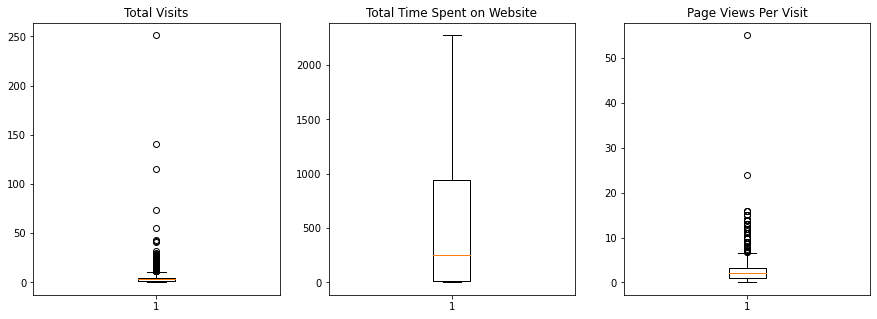

In [40]:
#check outliers for continous data

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Total Visits")
plt.boxplot(x_train['TotalVisits'])

plt.subplot(1,3,2)
plt.title("Total Time Spent on Website")
plt.boxplot(x_train['Total Time Spent on Website'])

plt.subplot(1,3,3)
plt.title("Page Views Per Visit")
plt.boxplot(x_train['Page Views Per Visit'])


plt.show()

In [41]:
scaler=MinMaxScaler()

In [42]:
#scale the numeric variables within 0-1
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_others,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_others,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_others,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_others,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier

In [43]:
#therefore the 3 variables 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' are normalised and the effected of their outliers is supressed as we can compare the vlaues before and after scaling

In [44]:
# try eliminating feature
x_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_others,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_others,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_others,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_others,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier

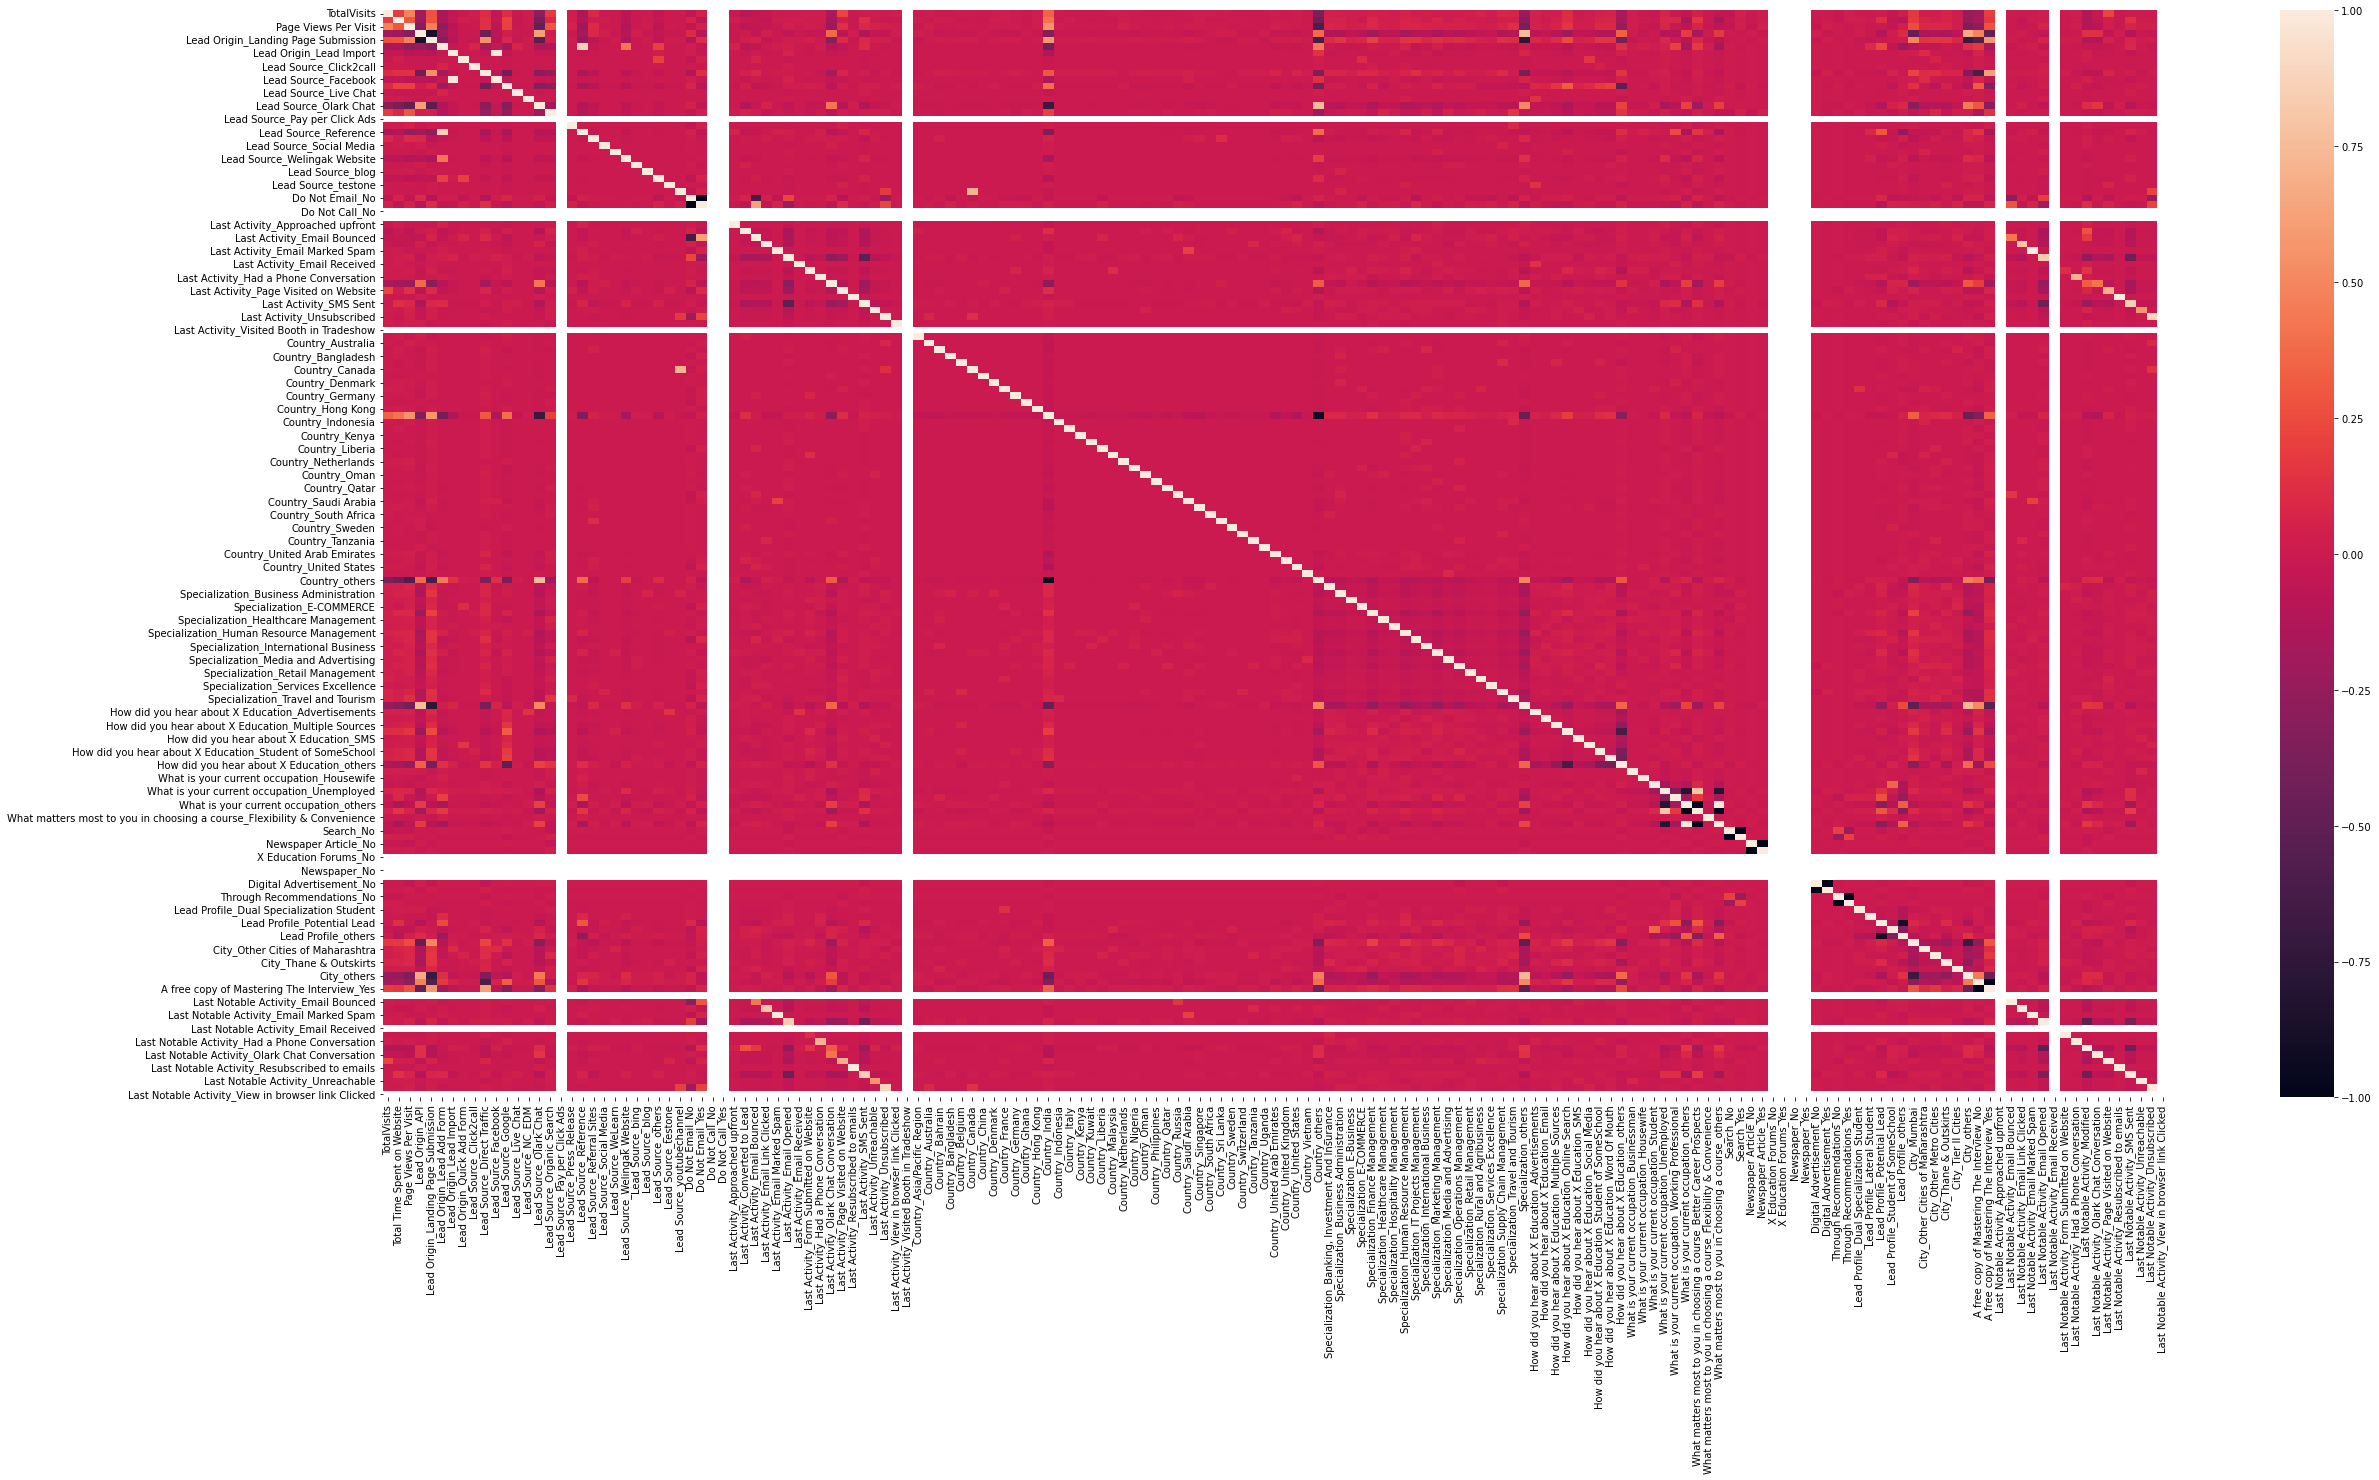

In [45]:
# try eliminating feature by visualization
fig,ax=plt.subplots(figsize=(40,20))
sns.heatmap(x_train.corr())
plt.show()

In [46]:
# dropping columns - Lead Source_Pay per Click Ads,Do Not Call_No, Do Not Call_Yes, Last Activity_Visited Booth in Tradeshow, X Education Forums_No, X Education Forums_Yes,Newspaper_No, Newspaper_Yes, Last Notable Activity_Approached upfront, Last Notable Activity_Email Received
x_train=x_train.drop(['Lead Source_Pay per Click Ads','Do Not Call_No', 'Do Not Call_Yes', 'Last Activity_Visited Booth in Tradeshow', 'X Education Forums_No', 'X Education Forums_Yes','Newspaper_No', 'Newspaper_Yes', 'Last Notable Activity_Approached upfront', 'Last Notable Activity_Email Received'],1)

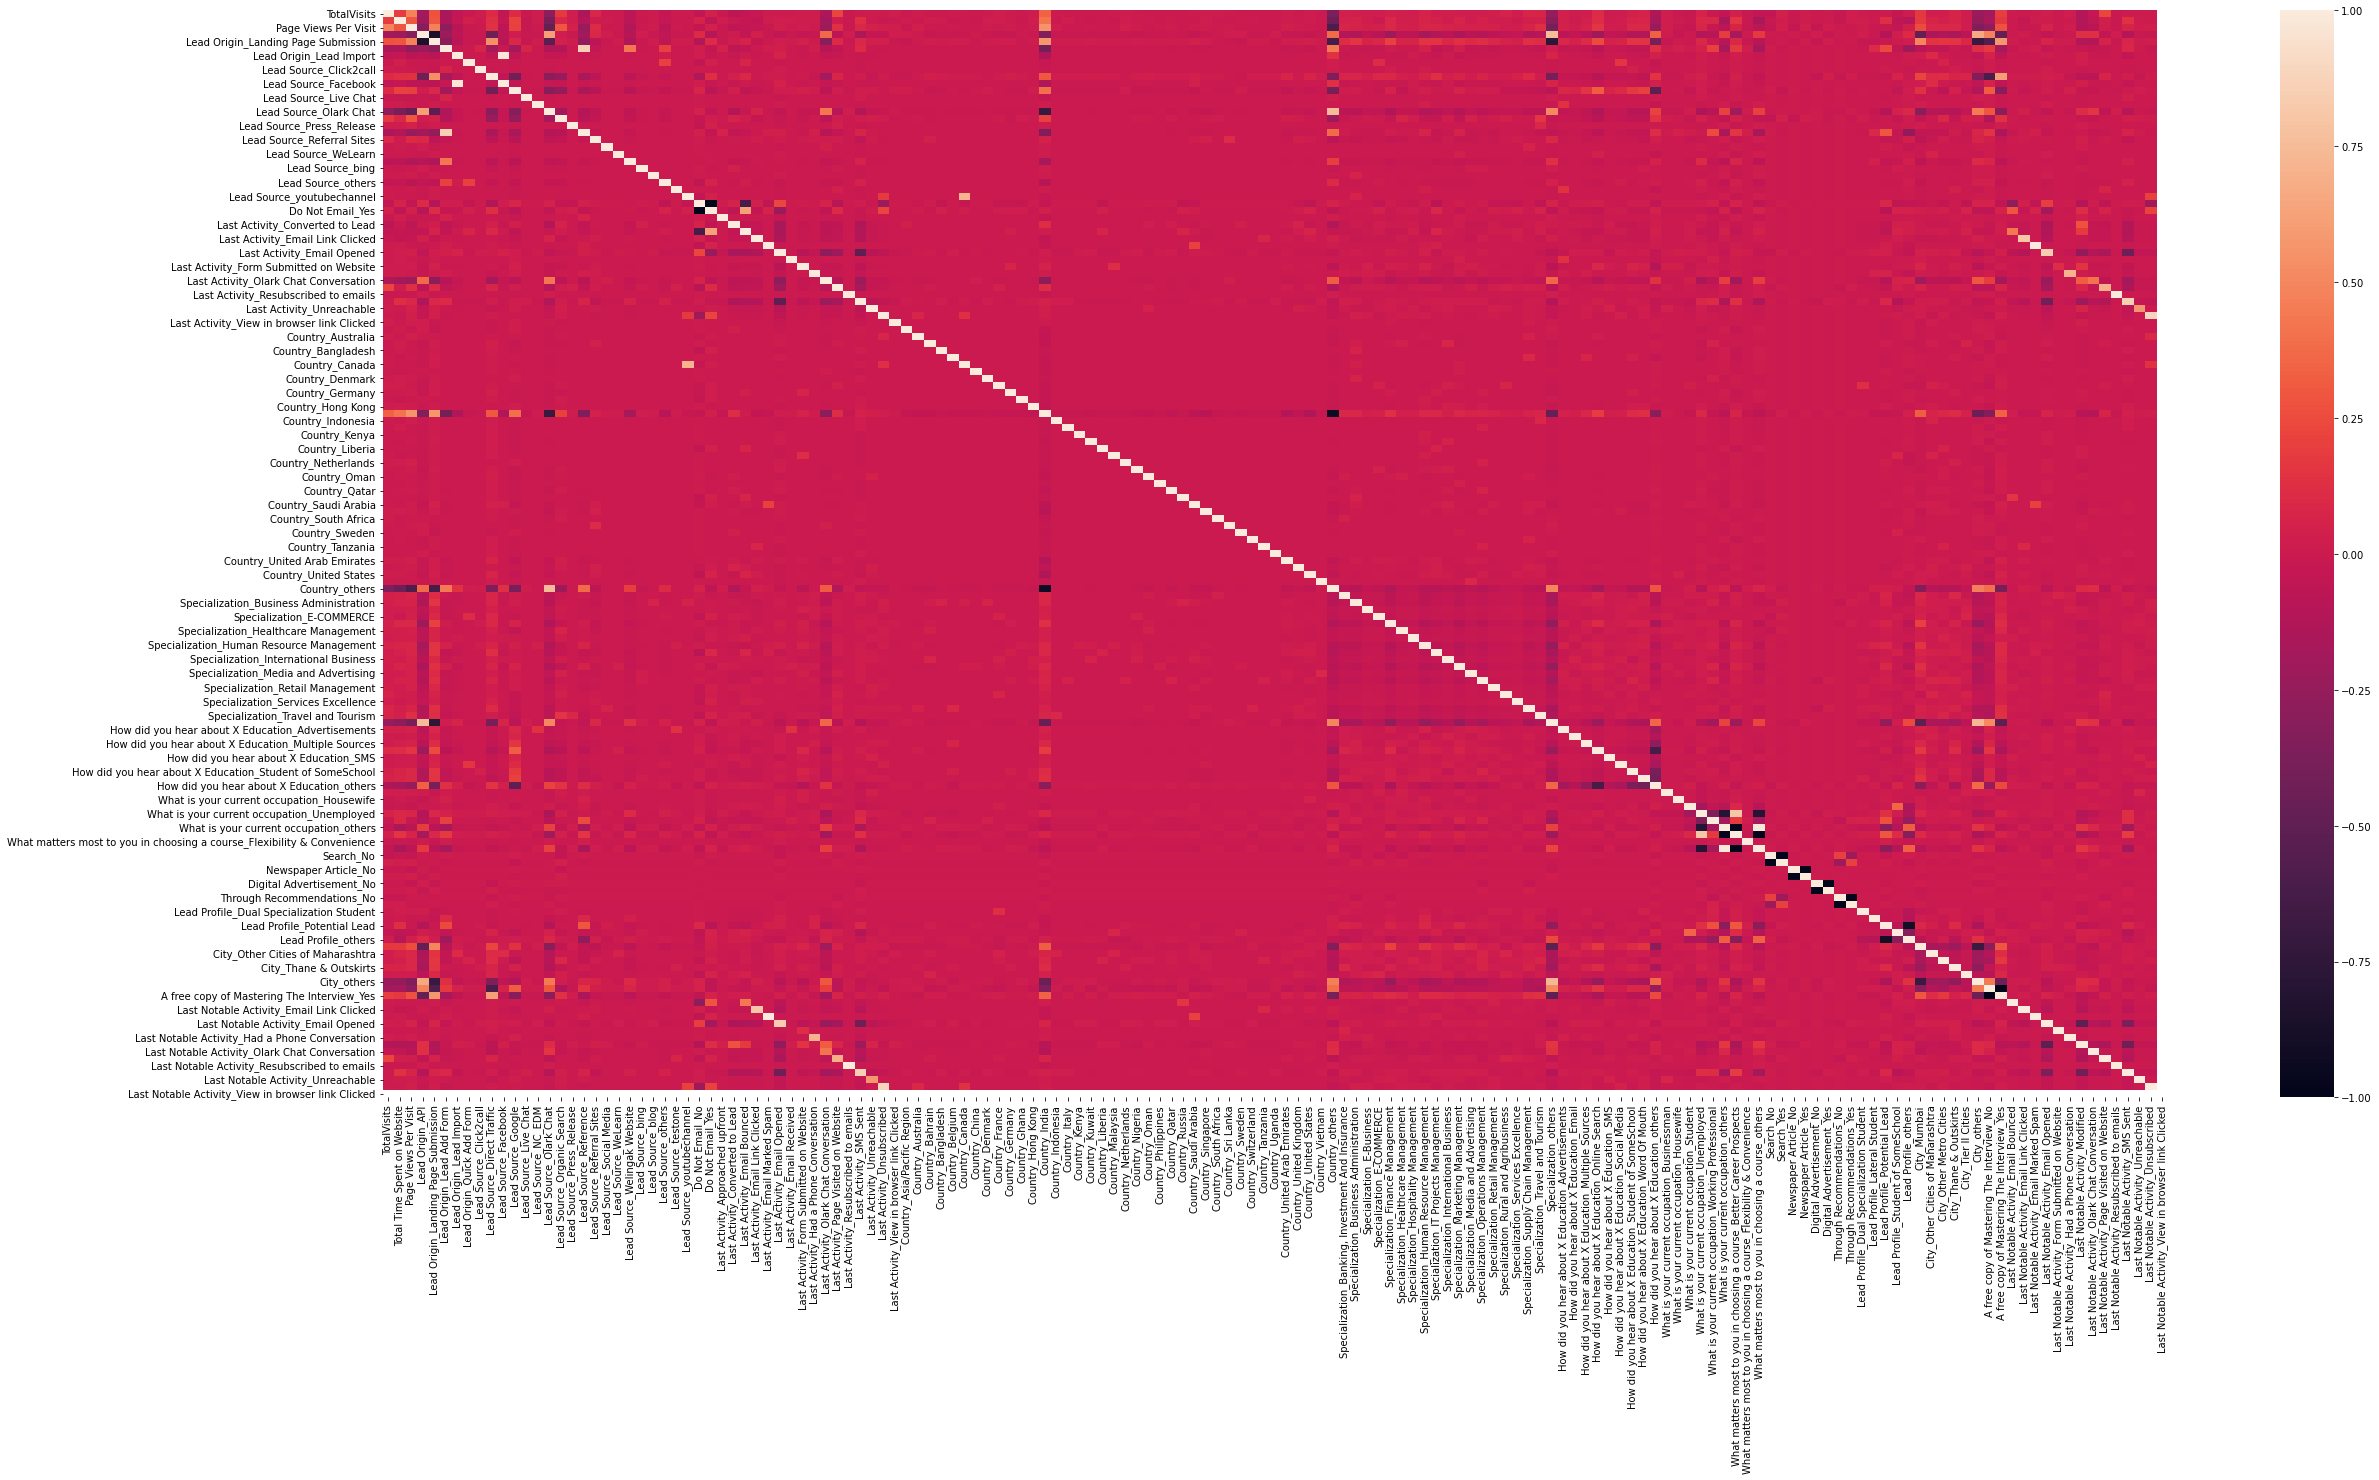

In [47]:
#verifying wether there is correlation between variables
fig,ax=plt.subplots(figsize=(40,20))
sns.heatmap(x_train.corr())
plt.show()

In [48]:
#correlation still exists, but dificult to identify, so let us go ahead with RFE
lgrg=LogisticRegression()

In [49]:
rfe=RFE(lgrg,n_features_to_select=20)
rfe=rfe.fit(x_train,y_train)

In [50]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_API', False, 114),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Origin_Quick Add Form', False, 121),
 ('Lead Source_Click2call', False, 99),
 ('Lead Source_Direct Traffic', False, 52),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 60),
 ('Lead Source_Live Chat', False, 63),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', False, 88),
 ('Lead Source_Organic Search', False, 59),
 ('Lead Source_Press_Release', False, 108),
 ('Lead Source_Reference', False, 86),
 ('Lead Source_Referral Sites', False, 83),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_WeLearn', False, 94),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 119),
 ('Lead Source_blog', False, 82),
 ('Lead Source_others', False, 22),
 ('Lead S

In [51]:
#store columns selected from rfe
rfe_col=x_train.columns[rfe.support_]

In [52]:
x_train=x_train[rfe_col]

In [53]:
#fitting the model
x_train_sm=sm.add_constant(x_train)
model=sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
op=model.fit()
op.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.9
Date:                Mon, 30 Jan 2023   Deviance:                       4973.9
Time:                        16:58:40   Pearson chi2:                 6.89e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4302
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.0759      0.127    -24.257      0.000      -3.324      -2.827
TotalVisits                                                               7.1658      2.212      3.240      0.001       2.831      11.500
Total Time Spent on Website                                               4.6361      0.173     26.870      0.000       4.298       4.974
Page Views Per Visit                                                     -3.1566      1.263     -2.499      0.012      -5.632      -0.681
Lead Origin_Lead Add Form                                                 1.9141      0.214      8.923      0.000       1.494       2.334
Lead Source_Welingak Website                                              2.4857      0.747      3.328      0.001       1.022       3.950
Do Not Email_Yes                                                         -1.2375      0.175     -7.066      0.000      -1.581      -0.894
Last Activity_Approached upfront                                         23.7401   2.71e+04      0.001      0.999   -5.31e+04    5.32e+04
Last Activity_SMS Sent                                                    1.2489      0.078     16.094      0.000       1.097       1.401
Country_Nigeria                                                         -24.0894   3.11e+04     -0.001      0.999    -6.1e+04    6.09e+04
Country_others                                                            1.1931      0.121      9.867      0.000       0.956       1.430
What is your current occupation_Housewife                                24.0520   2.41e+04      0.001      0.999   -4.72e+04    4.72e+04
What is your current occupation_Working Professional                      2.2239      0.193     11.545      0.000       1.846       2.601
What matters most to you in choosing a course_Better Career Prospects     0.9137      0.090     10.165      0.000       0.738       1.090
Lead Profile_Dual Specialization Student                                 23.4867   1.71e+04      0.001      0.999   -3.34e+04    3.35e+04
Lead Profile_Lateral Student                                              2.4553      1.070      2.295      0.022       0.359       4.552
Lead Profile_Potential Lead                                               1.4947      0.101     14.848      0.000       1.297       1.692
Lead Profile_Student of SomeSchool                                       -2.3512      0.465     -5.061      0.000      -3.262      -1.441
Last Notable Activity_Had a Phone Conversation                            3.1146      1.151      2.707      0.007       0.859       5.370
Last Notable Activity_Modified                 

In [54]:
#dropping feature with insignificant p-values
x_train.drop(['Last Activity_Approached upfront','What is your current occupation_Housewife','Lead Profile_Dual Specialization Student'],1, inplace=True)

In [55]:
#re-fitting the model
x_train_sm=sm.add_constant(x_train)
model1=sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
op=model1.fit()
op.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.6
Date:                Mon, 30 Jan 2023   Deviance:                       5015.2
Time:                        16:58:51   Pearson chi2:                 6.95e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4265
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.0757      0.126    -24.327      0.000      -3.324      -2.828
TotalVisits                                                               7.0232      2.200      3.192      0.001       2.710      11.336
Total Time Spent on Website                                               4.6444      0.172     26.985      0.000       4.307       4.982
Page Views Per Visit                                                     -3.1290      1.258     -2.487      0.013      -5.595      -0.663
Lead Origin_Lead Add Form                                                 1.9381      0.213      9.082      0.000       1.520       2.356
Lead Source_Welingak Website                                              2.4397      0.747      3.267      0.001       0.976       3.903
Do Not Email_Yes                                                         -1.2289      0.174     -7.066      0.000      -1.570      -0.888
Last Activity_SMS Sent                                                    1.2352      0.077     15.972      0.000       1.084       1.387
Country_Nigeria                                                         -22.0860   1.14e+04     -0.002      0.998   -2.25e+04    2.24e+04
Country_others                                                            1.1916      0.120      9.907      0.000       0.956       1.427
What is your current occupation_Working Professional                      2.2299      0.192     11.624      0.000       1.854       2.606
What matters most to you in choosing a course_Better Career Prospects     0.9374      0.090     10.454      0.000       0.762       1.113
Lead Profile_Lateral Student                                              2.4197      1.070      2.262      0.024       0.323       4.517
Lead Profile_Potential Lead                                               1.4758      0.100     14.699      0.000       1.279       1.673
Lead Profile_Student of SomeSchool                                       -2.3802      0.465     -5.121      0.000      -3.291      -1.469
Last Notable Activity_Had a Phone Conversation                            3.1032      1.151      2.696      0.007       0.847       5.359
Last Notable Activity_Modified                                           -0.9117      0.081    -11.281      0.000      -1.070      -0.753
Last Notable Activity_Unreachable                                         1.3178      0.544      2.420      0.016       0.251       2.385
=========================================================================================================================================
"""

In [56]:
#dropping feature with insignificant p-values
x_train.drop(['Country_Nigeria'],1, inplace=True)

In [57]:
#re-fitting the model
x_train_sm=sm.add_constant(x_train)
model2=sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
op=model2.fit()
op.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.6
Date:                Mon, 30 Jan 2023   Deviance:                       5021.3
Time:                        16:58:59   Pearson chi2:                 6.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4260
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -3.0759      0.126    -24.339      0.000      -3.324      -2.828
TotalVisits                                                               7.0659      2.203      3.208      0.001       2.749      11.383
Total Time Spent on Website                                               4.6414      0.172     26.987      0.000       4.304       4.978
Page Views Per Visit                                                     -3.1383      1.258     -2.495      0.013      -5.604      -0.673
Lead Origin_Lead Add Form                                                 1.9399      0.213      9.093      0.000       1.522       2.358
Lead Source_Welingak Website                                              2.4376      0.747      3.265      0.001       0.974       3.901
Do Not Email_Yes                                                         -1.2273      0.174     -7.058      0.000      -1.568      -0.887
Last Activity_SMS Sent                                                    1.2328      0.077     15.954      0.000       1.081       1.384
Country_others                                                            1.1925      0.120      9.919      0.000       0.957       1.428
What is your current occupation_Working Professional                      2.2323      0.192     11.641      0.000       1.856       2.608
What matters most to you in choosing a course_Better Career Prospects     0.9368      0.090     10.452      0.000       0.761       1.112
Lead Profile_Lateral Student                                              2.4186      1.070      2.261      0.024       0.322       4.516
Lead Profile_Potential Lead                                               1.4690      0.100     14.652      0.000       1.272       1.666
Lead Profile_Student of SomeSchool                                       -2.3797      0.465     -5.120      0.000      -3.291      -1.469
Last Notable Activity_Had a Phone Conversation                            3.1056      1.151      2.699      0.007       0.850       5.361
Last Notable Activity_Modified                                           -0.9090      0.081    -11.253      0.000      -1.067      -0.751
Last Notable Activity_Unreachable                                         1.3195      0.544      2.425      0.015       0.253       2.386
=========================================================================================================================================
"""

In [58]:
# since all the variables are significant with p-value, now let's check VIF

#create dataframe to store VIF
vif_df=pd.DataFrame()
vif_df['features/columns']=x_train.columns
vif_df['VIF']= [variance_inflation_factor(x_train.values,a) for a in range(x_train.shape[1])]
vif_df

,features/columns,VIF
0,TotalVisits,1.868467
1,Total Time Spent on Website,2.083043
2,Page Views Per Visit,3.012512
3,Lead Origin_Lead Add Form,1.813777
4,Lead Source_Welingak Website,1.287821
5,Do Not Email_Yes,1.111155
6,Last Activity_SMS Sent,1.503250
7,Country_others,1.797511
8,What is your current occupation_Working Profes...,1.225769
9,What matters most to you in choosing a course_...,3.175972


In [59]:
vif_df1=vif_df.sort_values(by="VIF", ascending=True)
vif_df1

,features/columns,VIF
13,Last Notable Activity_Had a Phone Conversation,1.005861
15,Last Notable Activity_Unreachable,1.007553
10,Lead Profile_Lateral Student,1.019666
12,Lead Profile_Student of SomeSchool,1.081661
5,Do Not Email_Yes,1.111155
8,What is your current occupation_Working Profes...,1.225769
4,Lead Source_Welingak Website,1.287821
6,Last Activity_SMS Sent,1.503250
14,Last Notable Activity_Modified,1.509964
11,Lead Profile_Potential Lead,1.512459


In [60]:
#therefore 15 variables/features have significant p-value and VIF, so models seems to be a good fit at this point of time

In [61]:
#after the predictor varaibles are known according to the significance, now need to calculate the probability of leads getting converted
y_train_pred=op.predict(x_train_sm)


In [62]:
y_train_pred_final = pd.DataFrame({'actual-convertion':y_train.values, 'probability':y_train_pred})
y_train_pred_final.head()

,actual-convertion,probability
3372,0,0.057742
6774,1,0.942767
7511,0,0.085996
6365,0,0.123563
4987,0,0.478819


In [63]:
# mapping probability to convertion prediction by taking cut off as 0.6 ie any lead with above probability of 0.6 would convert and below it will not
y_train_pred_final['conversion-predicted']=y_train_pred_final.probability.map(lambda a:1 if a >0.6 else 0)
y_train_pred_final.head()

,actual-convertion,probability,conversion-predicted
3372,0,0.057742,0
6774,1,0.942767,1
7511,0,0.085996,0
6365,0,0.123563,0
4987,0,0.478819,0


In [64]:
y_train_pred_final1=y_train_pred_final

In [65]:
# evaluating model
confusion = metrics.confusion_matrix(y_train_pred_final['actual-convertion'], y_train_pred_final['conversion-predicted'])
confusion

array([[3672,  316],
       [ 882, 1598]], dtype=int64)

In [66]:
# predicted        0         1
# actual          
#  0              3672     316
#  1               882     1598

In [67]:
#calculate overall accuracy of the model
metrics.accuracy_score(y_train_pred_final['actual-convertion'], y_train_pred_final['conversion-predicted'])

0.8147804576376005

In [68]:
# the model built is able to explain 81.5% accurately 

In [69]:
# map TP, TN, FP, FN to calculate sensitivity and accuracy

TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [70]:
# sensitivity
TP/(TP+FN)

0.6443548387096775

In [71]:
# specificity
TN/(TN+FP)

0.9207622868605817

In [72]:
#with a cut off of 60 model almost explains 82% of accuracy with 64% of sensitivity and 92% of specificity 
# meaning model has more capacity to predict the leads those who will not convert than the leads who will convert 
# here decision can be made on conducting a campaign to specific leads

In [73]:
#plotting ROC curve 
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('Receiver operating characteristic for Lead conversion')
    plt.legend(loc="best")
    plt.show()
    return None 

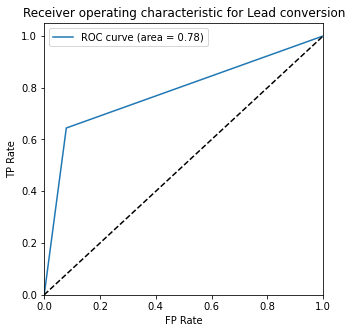

In [74]:
roc_curve(y_train_pred_final['actual-convertion'], y_train_pred_final['conversion-predicted'])

In [75]:
# the area under the curve is 0.78
#in order to determine the best cut off value we need to find out the probability at which we have high overall accuracy, high sensitivity and high specificity or all 3 needs to be same

In [76]:
#so we first start by predicting wether conversions happen or not at each probability
numbers = [float(b)/10 for b in range(10)]
for p in numbers:
    y_train_pred_final[p]= y_train_pred_final.probability.map(lambda b: 1 if b > p else 0)

y_train_pred_final

,actual-convertion,probability,conversion-predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3372,0,0.057742,0,1,0,0,0,0,0,0,0,0,0
6774,1,0.942767,1,1,1,1,1,1,1,1,1,1,1
7511,0,0.085996,0,1,0,0,0,0,0,0,0,0,0
6365,0,0.123563,0,1,1,0,0,0,0,0,0,0,0
4987,0,0.478819,0,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0,0.057742,0,1,0,0,0,0,0,0,0,0,0
3714,1,0.559504,0,1,1,1,1,1,1,0,0,0,0
7409,1,0.881914,1,1,1,1,1,1,1,1,1,1,0
3325,1,0.975759,1,1,1,1,1,1,1,1,1,1,1


In [77]:
#calculating accuracy, sensitivity, specificity for each probability
cut_off = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

prob = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for a in prob:
    
    cm1 = metrics.confusion_matrix(y_train_pred_final['actual-convertion'], y_train_pred_final[a] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
                               
    cut_off.loc[a] =[ a ,accuracy,sensitivity,specificity]
    
print(cut_off)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.383426     1.000000     0.000000
0.1          0.1  0.645176     0.977016     0.438816
0.2          0.2  0.778602     0.918145     0.691825
0.3          0.3  0.810761     0.855242     0.783099
0.4          0.4  0.819419     0.779435     0.844283
0.5          0.5  0.823748     0.717339     0.889920
0.6          0.6  0.814780     0.644355     0.920762
0.7          0.7  0.801639     0.568952     0.946339
0.8          0.8  0.777211     0.470161     0.968154
0.9          0.9  0.731756     0.322984     0.985958


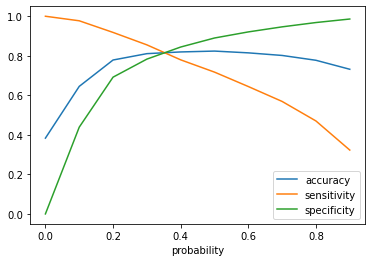

<Figure size 432x288 with 0 Axes>

In [114]:
cut_off.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [79]:
#from cut_off data frame and visualization above we find that accuracy, specificity and sensitivity are equal af some point between 0.3 and 0.4 
# so inorder to find even more approximate value let us observe at the intersection in the range prob = [0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39]


numbers1 = [float(c)/100 for c in range(30,40,1)]
for q in numbers1:

    #accessing previously created redunadant data frame of y_train_pred_final ie y_train_pred_final1
    y_train_pred_final1[q]= y_train_pred_final1.probability.map(lambda c: 1 if c > q else 0)


y_train_pred_final1


,actual-convertion,probability,conversion-predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39
3372,0,0.057742,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6774,1,0.942767,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7511,0,0.085996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6365,0,0.123563,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4987,0,0.478819,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0,0.057742,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3714,1,0.559504,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1
7409,1,0.881914,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
3325,1,0.975759,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [80]:
y_train_pred_final1[[0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39]]

,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39
3372,0,0,0,0,0,0,0,0,0,0
6774,1,1,1,1,1,1,1,1,1,1
7511,0,0,0,0,0,0,0,0,0,0
6365,0,0,0,0,0,0,0,0,0,0
4987,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
278,0,0,0,0,0,0,0,0,0,0
3714,1,1,1,1,1,1,1,1,1,1
7409,1,1,1,1,1,1,1,1,1,1
3325,1,1,1,1,1,1,1,1,1,1


In [81]:
cut_off1 = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

prob1 = [0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39]

for b in prob1:
    
    cm2 = metrics.confusion_matrix(y_train_pred_final1['actual-convertion'], y_train_pred_final1[b] )
    total2=sum(sum(cm2))
    
    accuracy = (cm2[0,0]+cm2[1,1])/total2
    sensitivity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
    specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
                               
    cut_off1.loc[b] =[ b ,accuracy,sensitivity,specificity]
    
print(cut_off1)

      probability  accuracy  sensitivity  specificity
0.30         0.30  0.810761     0.855242     0.783099
0.31         0.31  0.811998     0.846774     0.790371
0.32         0.32  0.813389     0.842742     0.795135
0.33         0.33  0.815708     0.837500     0.802156
0.34         0.34  0.817254     0.831855     0.808175
0.35         0.35  0.817100     0.816129     0.817703
0.36         0.36  0.816327     0.810484     0.819960
0.37         0.37  0.817100     0.800403     0.827482
0.38         0.38  0.819573     0.794758     0.835005
0.39         0.39  0.819573     0.785887     0.840522


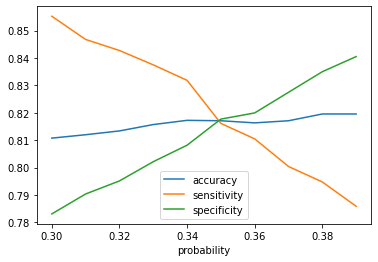

<Figure size 432x288 with 0 Axes>

In [115]:
cut_off1.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [83]:
# therefore from the data frame cut_off1 and visualization we find that the optimal cut off would be 0.35

In [84]:
y_train_pred_final['optimal-prediction']=y_train_pred_final.probability.map(lambda a:1 if a >0.35 else 0)
y_train_pred_final.head()

,actual-convertion,probability,conversion-predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,optimal-prediction
3372,0,0.057742,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6774,1,0.942767,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7511,0,0.085996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6365,0,0.123563,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4987,0,0.478819,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1


In [85]:
metrics.accuracy_score(y_train_pred_final['actual-convertion'], y_train_pred_final['optimal-prediction'])

0.8170995670995671

In [86]:
confusion1 = metrics.confusion_matrix(y_train_pred_final['actual-convertion'], y_train_pred_final['optimal-prediction'])
confusion1

array([[3261,  727],
       [ 456, 2024]], dtype=int64)

In [87]:
TP1=confusion1[1,1]
TN1=confusion1[0,0]
FP1=confusion1[0,1]
FN1=confusion1[1,0]

In [88]:
(TP1+TN1)/(TP1+TN1+FP1+FN1)

0.8170995670995671

In [89]:
TP1/(TP1+FN1)

0.8161290322580645

In [90]:
TN1/(TN1+FP1)

0.817703109327984

In [91]:
# with optimal cut off value of probability of 0.35 the model has accuracy, sensitivity, specificity all 3 to be equal to 82% which is a pretty good prediction

In [92]:
#till now we validated the model on train data and now we need to test the model on test data

In [93]:
# so again we need to normalise the continous varaibles of test data so the analysis does not gets skewed

In [94]:
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_others,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_others,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_others,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_others,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier

In [95]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_others,Lead Source_testone,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_others,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,How did you hear about X Education_others,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_others,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_others,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier

In [96]:
clmns=x_train.columns

In [97]:
x_test=x_test[clmns]
x_test_sm=sm.add_constant(x_test[clmns])
x_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Country_others,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
5215,1.0,0.018519,0.119139,0.066667,0,0,0,0,0,0,1,0,0,0,0,1,0
3731,1.0,0.000000,0.000000,0.000000,1,0,0,1,1,0,1,0,1,0,0,0,0
3310,1.0,0.018519,0.560766,0.066667,0,0,0,1,1,0,0,0,0,0,0,0,0
3358,1.0,0.092593,0.117225,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0
2250,1.0,0.055556,0.048325,0.200000,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,1.0,0.111111,0.053589,0.200000,0,0,0,0,0,0,0,0,0,0,0,0,0
3183,1.0,0.000000,0.000000,0.000000,0,0,0,1,1,0,1,0,0,0,0,0,0
7778,1.0,0.037037,0.145933,0.133333,0,0,0,0,0,0,1,0,0,0,0,1,0
2090,1.0,0.055556,0.011962,0.200000,0,0,0,1,0,1,1,0,0,0,0,0,0


In [98]:
# using op since it was previously fit and modeled
y_test_pred=op.predict(x_test_sm)
#transforming y_test_pred to data frame
y_pred_df=pd.DataFrame(y_test_pred)
y_pred_df

,0
5215,0.070867
3731,0.975759
3310,0.866906
3358,0.083129
2250,0.044837
...,...
3311,0.064785
3183,0.571088
7778,0.073956
2090,0.758871


In [99]:
#same needs to done for y_test
y_test_df=pd.DataFrame(y_test)
y_test_df

,Converted
5215,0
3731,1
3310,1
3358,0
2250,0
...,...
3311,0
3183,1
7778,0
2090,1


In [100]:
#since both the data frames have different index which may not match while joining together, we need to remove index before joining them
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [101]:
y_pred_df

,0
0,0.070867
1,0.975759
2,0.866906
3,0.083129
4,0.044837
...,...
2767,0.064785
2768,0.571088
2769,0.073956
2770,0.758871


In [102]:
y_test_df

,Converted
0,0
1,1
2,1
3,0
4,0
...,...
2767,0
2768,1
2769,0
2770,1


In [103]:
#appending both the data frames
y_final=pd.concat([y_test_df, y_pred_df], axis=1)
y_final

,Converted,0
0,0,0.070867
1,1,0.975759
2,1,0.866906
3,0,0.083129
4,0,0.044837
...,...,...
2767,0,0.064785
2768,1,0.571088
2769,0,0.073956
2770,1,0.758871


In [104]:
#rename column
y_final= y_final.rename(columns = {0 : 'Conversion_Probability'})
y_final

,Converted,Conversion_Probability
0,0,0.070867
1,1,0.975759
2,1,0.866906
3,0,0.083129
4,0,0.044837
...,...,...
2767,0,0.064785
2768,1,0.571088
2769,0,0.073956
2770,1,0.758871


In [105]:
y_final['predicted_conversion']= y_final.Conversion_Probability.map(lambda f:1 if f>0.35 else 0)
y_final

,Converted,Conversion_Probability,predicted_conversion
0,0,0.070867,0
1,1,0.975759,1
2,1,0.866906,1
3,0,0.083129,0
4,0,0.044837,0
...,...,...,...
2767,0,0.064785,0
2768,1,0.571088,1
2769,0,0.073956,0
2770,1,0.758871,1


In [106]:
#checking the accuracy of built model
metrics.accuracy_score(y_final['Converted'], y_final.predicted_conversion)

0.8286435786435786

In [107]:
#check the confusion matrix
confusion2 = metrics.confusion_matrix(y_final['Converted'], y_final.predicted_conversion)
confusion2

array([[1381,  310],
       [ 165,  916]], dtype=int64)

In [108]:
TP2=confusion2[1,1]
TN2=confusion2[0,0]
FP2=confusion2[0,1]
FN2=confusion2[1,0]

In [109]:
TP2/(TP2+FN2)

0.84736355226642

In [110]:
TN2/(TN2+FP2)

0.8166765227675932

In [111]:
#the model built is performing well so far as the accuracy, sensitivity, specificity all 3 are almost same and are above 81%

In [112]:
op.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,-3.0759,0.126,-24.339,0.000,-3.324,-2.828
TotalVisits,7.0659,2.203,3.208,0.001,2.749,11.383
Total Time Spent on Website,4.6414,0.172,26.987,0.000,4.304,4.978
Page Views Per Visit,-3.1383,1.258,-2.495,0.013,-5.604,-0.673
Lead Origin_Lead Add Form,1.9399,0.213,9.093,0.000,1.522,2.358
Lead Source_Welingak Website,2.4376,0.747,3.265,0.001,0.974,3.901
Do Not Email_Yes,-1.2273,0.174,-7.058,0.000,-1.568,-0.887
Last Activity_SMS Sent,1.2328,0.077,15.954,0.000,1.081,1.384
Country_others,1.1925,0.120,9.919,0.000,0.957,1.428
What is your current occupation_Working Professional,2.2323,0.192,11.641,0.000,1.856,2.608


In [113]:
# therefore the model which assignes lead score from 0-100 is 
# conversion = -3.0759 + (7.0659)TotalVisits + (4.6414)Total Time Spent on Website - (3.1383)Page Views Per Visit 
#              + (1.9399)Lead Origin_Lead Add Form + (2.4376)Lead Source_Welingak Website - (1.2273)Do Not Email_Yes  
#              + (1.2328)Last Activity_SMS Sent + (1.1925)Country_others + (2.2323)What is your current occupation_Working Professional 
#              + (0.9368)What matters most to you in choosing a course_Better Career Prospects
#              + (2.4186)Lead Profile_Lateral Student + (1.4690)Lead Profile_Potential Lead
#              - (2.3797)Lead Profile_Student of SomeSchool + (3.1056)Last Notable Activity_Had a Phone Conversation
#              - (0.9090)Last Notable Activity_Modified + (1.3195)Last Notable Activity_Unreachable